# Boundary Extraction Algorithm

In [1]:
# Importing libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology

In [16]:
# Reading Image

im=cv2.imread('/home/shagun/Downloads/object.jpeg')

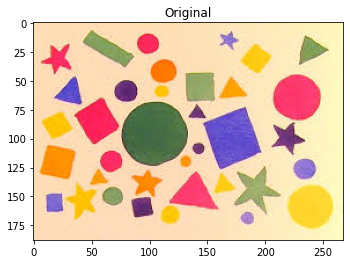

In [17]:
# Displaying Image

def display(img,title="Original"):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img,cmap='gray'),plt.title(title)
    plt.show()
    
display(im)

In [18]:
# Creating Structuring Element
size=5
struct=np.ones([size,size])
print(struct)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


### Image Erosion

+ All local pixel of the image have to overlap those of the structuring element

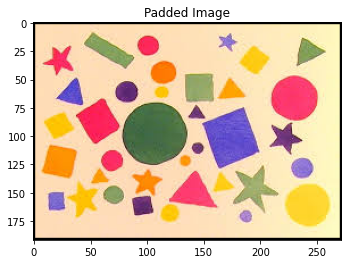

In [19]:
# Padding Image

x,y,z=np.shape(im)
sx,sy=np.shape(struct)
color=(0,0,0)
nx,ny,nz=x+2*int(sx/2),y+2*int(sy/2),z
res=np.full((nx,ny,nz),color,dtype=np.uint8)
xx=(nx-x)//2
yy=(ny-y)//2
res[xx:xx+x,yy:yy+y]=im
display(res,"Padded Image")

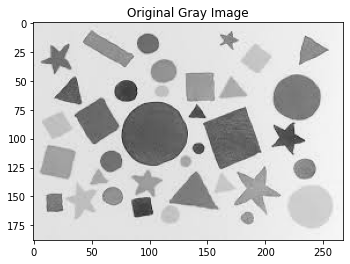

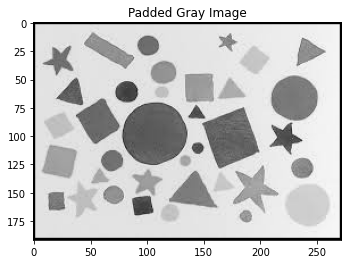

In [20]:
# Converting Original Image into grayscale
im_gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
display(im_gray,"Original Gray Image")

# Converting Padded Image into grayscale
res_gray=cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
display(res_gray,"Padded Gray Image")

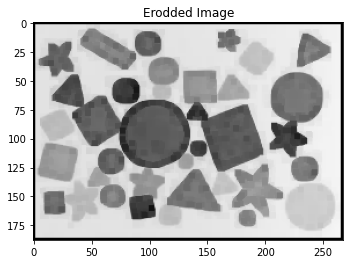

(188, 268)

In [21]:
def erode(img,struct):
    x,y=np.shape(img)
    fx,fy=np.shape(struct)
    new_res=np.zeros((x-fx+1,y-fy+1))
    
    for i in range(x-fx+1):
        for j in range(y-fy+1):
            new_res[i,j]=np.amin(struct*img[i:i+fx,j:j+fy])
    
    return new_res.astype(np.uint8)

im_erode=erode(res_gray,struct)
display(im_erode,"Erodded Image")
im_erode.shape

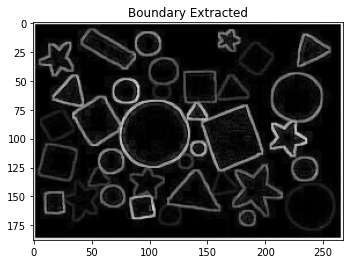

In [22]:
display(im_gray-im_erode,"Boundary Extracted")